In [1]:
from OF_trigger import *
from trace_IO import *
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

sampling_frequency = 3906250
template = np.load("../templates/template_K_alpha_no_baseline.npy")
noise_psd = np.load("../templates/noise_psd_from_MMC.npy")

# Initialize Optimum Filter
trigger = OFtrigger(template, noise_psd, sampling_frequency)

In [2]:
sigma = 0.7674 #sigma for the fixed OF ampl distribution with MMC noise traces
thresholds = [round(n * sigma, 4) for n in [3, 4, 5]]
energy_values = list(range(2, 151, 2))
pass_rates_by_threshold = {th: [] for th in thresholds}

n_sets = 300  # Adjust as needed

for energy in tqdm(energy_values, desc="Processing energies"):
    trace_path = f"/ceph/dwong/trigger_samples/large_samples/ER/traces_energy_{energy}.zst"
    loaded_traces = load_traces_from_zstd(trace_path, n_traces=n_sets)

    max_amplitudes = []

    for i in range(n_sets):
        amps = [trigger.fit_with_shift(trace)[0] for trace in loaded_traces[i]]
        max_amplitudes.append(np.max(amps))

    max_amplitudes = np.array(max_amplitudes)

    for th in thresholds:
        pass_rate = np.sum(max_amplitudes > th) / n_sets
        pass_rates_by_threshold[th].append(pass_rate)

sigma_labels = {
    thresholds[0]: '3σ',
    thresholds[1]: '4σ',
    thresholds[2]: '5σ'
}

plt.figure(figsize=(10, 6))
for th in thresholds:
    plt.plot(energy_values, pass_rates_by_threshold[th], label=sigma_labels[th])

plt.xlabel('Recoil Energy (eV)')
plt.ylabel('Efficiency')
plt.title('Individual channel trigger efficiency vs Energy for ER')
plt.legend(title='Thresholds')
plt.grid(True)
plt.tight_layout()
plt.show()



Processing energies:  21%|██▏       | 16/75 [09:17<34:16, 34.86s/it]


KeyboardInterrupt: 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Parameters
n_sets = 1000
sigma = 0.7674  # known sigma from MMC noise traces
thresholds = [round(n * sigma, 4) for n in [3, 4, 5]]
sigma_labels = {
    thresholds[0]: '3σ',
    thresholds[1]: '4σ',
    thresholds[2]: '5σ'
}

# Load 0 eV traces
trace_path = "/ceph/dwong/trigger_samples/traces_energy_0.zst"
loaded_traces = load_traces_from_zstd(trace_path, n_traces=n_sets)

# Collect all OF amplitudes
all_amplitudes = []

for i in tqdm(range(n_sets), desc="Processing 0 eV traces"):
    amps = [trigger.fit_with_shift(trace)[0] for trace in loaded_traces[i]]
    all_amplitudes.extend(amps)

all_amplitudes = np.array(all_amplitudes)

# Compute and print statistics
mean_amp = np.mean(all_amplitudes)
std_amp = np.std(all_amplitudes)
print(f"Mean OF amplitude: {mean_amp:.4f}")
print(f"Std OF amplitude: {std_amp:.4f}")

# Calculate and print pass rates
for th in thresholds:
    pass_rate = np.sum(all_amplitudes > th) / len(all_amplitudes)
    print(f"Pass rate for {sigma_labels[th]} threshold ({th}): {pass_rate:.4%}")

# Plot histogram of all OF amplitudes
plt.figure(figsize=(10, 6))
plt.hist(all_amplitudes, bins=100, alpha=0.7, edgecolor='black', density=True)
for th in thresholds:
    plt.axvline(th, linestyle='--', label=f'{sigma_labels[th]} threshold ({th:.2f})')
plt.xlabel('OF Amplitude')
plt.ylabel('Density')
plt.title('Fixed OF amplitude Distribution for MMC noise traces')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/ceph/dwong/trigger_samples/traces_energy_0.zst'

Processing 0 eV traces: 100%|██████████| 1000/1000 [01:30<00:00, 11.02it/s]


Mean OF amplitude: -0.0078
Std OF amplitude: 2.2643
Pass rate for 3σ threshold (2.3022): 18.3833%
Pass rate for 4σ threshold (3.0696): 0.1963%
Pass rate for 5σ threshold (3.837): 0.0000%


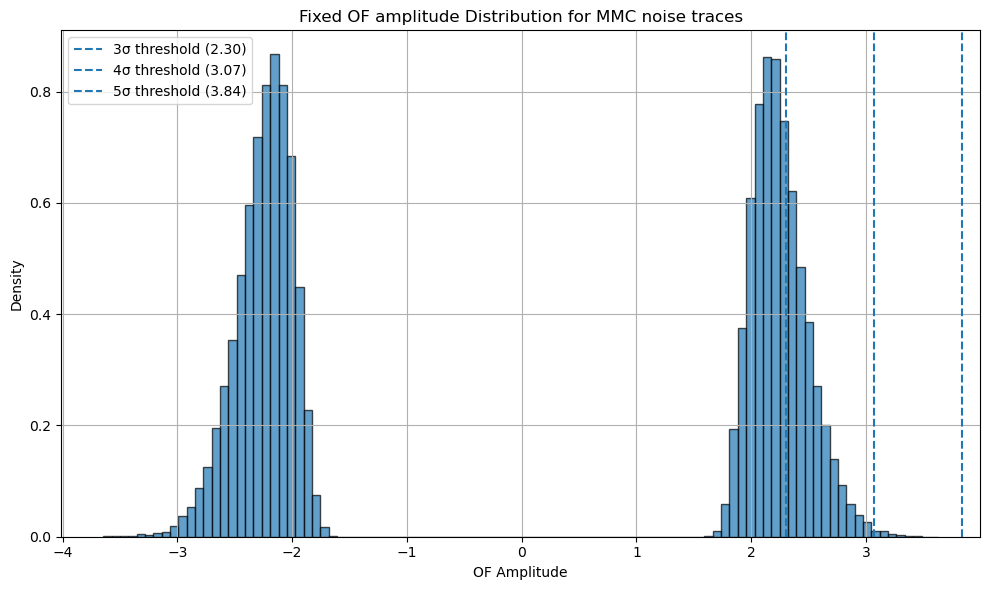

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Parameters
n_sets = 1000
sigma = 0.7674  # known sigma from MMC noise traces
thresholds = [round(n * sigma, 4) for n in [3, 4, 5]]
sigma_labels = {
    thresholds[0]: '3σ',
    thresholds[1]: '4σ',
    thresholds[2]: '5σ'
}

# Load 0 eV traces
trace_path = "/ceph/dwong/trigger_samples/traces_energy_0.zst"
loaded_traces = load_traces_from_zstd(trace_path, n_traces=n_sets)

# Collect all OF amplitudes
all_amplitudes = []

for i in tqdm(range(n_sets), desc="Processing 0 eV traces"):
    amps = [trigger.fit_with_shift(trace)[0] for trace in loaded_traces[i]]
    all_amplitudes.extend(amps)

all_amplitudes = np.array(all_amplitudes)

# Compute and print statistics
mean_amp = np.mean(all_amplitudes)
std_amp = np.std(all_amplitudes)
print(f"Mean OF amplitude: {mean_amp:.4f}")
print(f"Std OF amplitude: {std_amp:.4f}")

# Calculate and print pass rates
for th in thresholds:
    pass_rate = np.sum(all_amplitudes > th) / len(all_amplitudes)
    print(f"Pass rate for {sigma_labels[th]} threshold ({th}): {pass_rate:.4%}")

# Plot histogram of all OF amplitudes
plt.figure(figsize=(10, 6))
plt.hist(all_amplitudes, bins=100, alpha=0.7, edgecolor='black', density=True)
for th in thresholds:
    plt.axvline(th, linestyle='--', label=f'{sigma_labels[th]} threshold ({th:.2f})')
plt.xlabel('OF Amplitude')
plt.ylabel('Density')
plt.title('Fixed OF amplitude Distribution for MMC noise traces')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


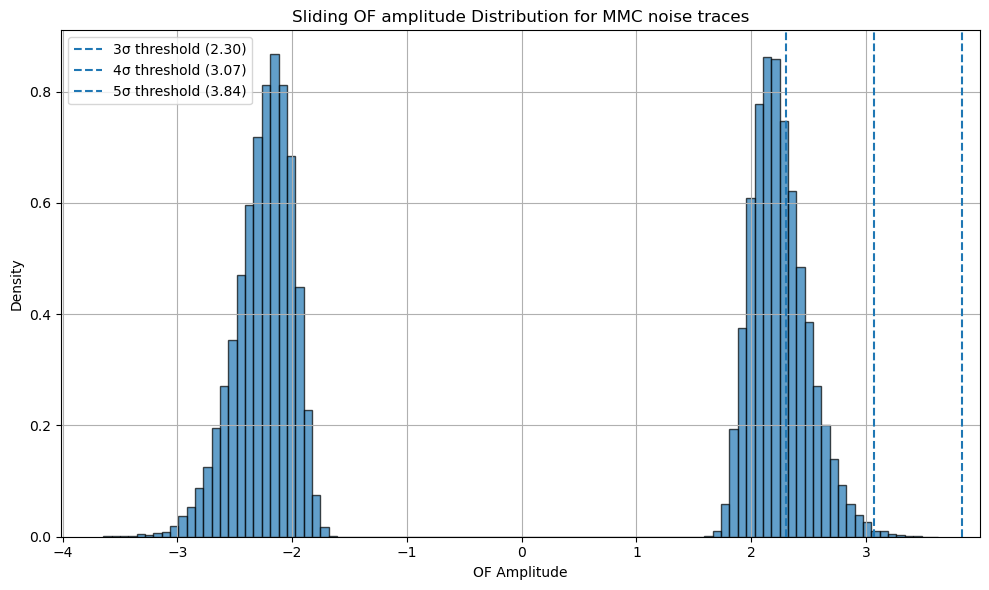

In [16]:
# Plot histogram of all OF amplitudes
plt.figure(figsize=(10, 6))
plt.hist(all_amplitudes, bins=100, alpha=0.7, edgecolor='black', density=True)
for th in thresholds:
    plt.axvline(th, linestyle='--', label=f'{sigma_labels[th]} threshold ({th:.2f})')
plt.xlabel('OF Amplitude')
plt.ylabel('Density')
plt.title('Sliding OF amplitude Distribution for MMC noise traces')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Processing energies: 100%|██████████| 30/30 [04:35<00:00,  9.20s/it]


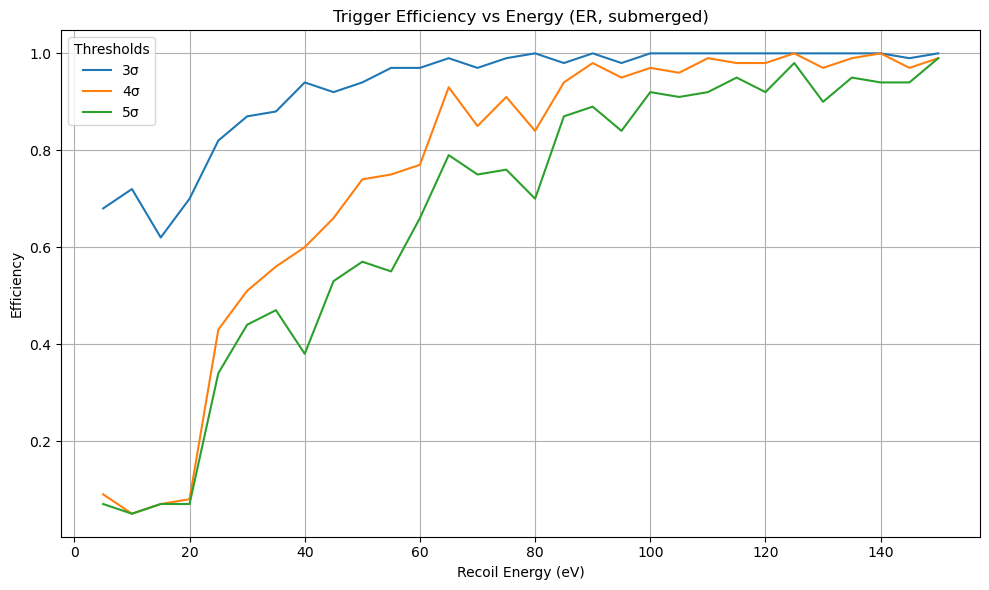

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

n_sets = 100
sigma = 0.7674  # sigma for the fixed OF ampl distribution with MMC noise traces
thresholds = [round(n * sigma, 4) for n in [3, 4, 5]]
energy_values = list(range(5, 151, 5))
pass_rates_by_threshold = {th: [] for th in thresholds}

for energy in tqdm(energy_values, desc="Processing energies"):
    trace_path = f"/ceph/dwong/trigger_samples/ER/traces_energy_{energy}.zst"
    loaded_traces = load_traces_from_zstd(trace_path, n_traces=n_sets)  # shape: (n_sets, 54, trace_length)

    effective_amplitudes = []

    for i in range(n_sets):
        # Only use first 45 channels
        traces_subset = loaded_traces[i][:45]  # shape: (45, trace_length)
        results = [trigger.fit_with_shift(trace) for trace in traces_subset]
        amps = np.array([res[0] for res in results])
        t0s = np.array([res[2] for res in results])  # t₀ is the third value

        top2_indices = np.argsort(amps)[-2:][::-1]  # Indices of top 2 amplitudes
        a1, t1 = amps[top2_indices[0]], t0s[top2_indices[0]]
        a2, t2 = amps[top2_indices[1]], t0s[top2_indices[1]]

        if abs(t1 - t2) < 100:
            effective_amplitude = a1 + a2
        else:
            effective_amplitude = a1

        effective_amplitudes.append(effective_amplitude)

    effective_amplitudes = np.array(effective_amplitudes)

    for th in thresholds:
        pass_rate = np.sum(effective_amplitudes > th) / n_sets
        pass_rates_by_threshold[th].append(pass_rate)

# Plotting
sigma_labels = {
    thresholds[0]: '3σ',
    thresholds[1]: '4σ',
    thresholds[2]: '5σ'
}

plt.figure(figsize=(10, 6))
for th in thresholds:
    plt.plot(energy_values, pass_rates_by_threshold[th], label=sigma_labels[th])

plt.xlabel('Recoil Energy (eV)')
plt.ylabel('Efficiency')
plt.title('Trigger Efficiency vs Energy (ER, submerged)')
plt.legend(title='Thresholds')
plt.grid(True)
plt.tight_layout()
plt.show()


Processing energies: 100%|██████████| 30/30 [09:35<00:00, 19.20s/it]


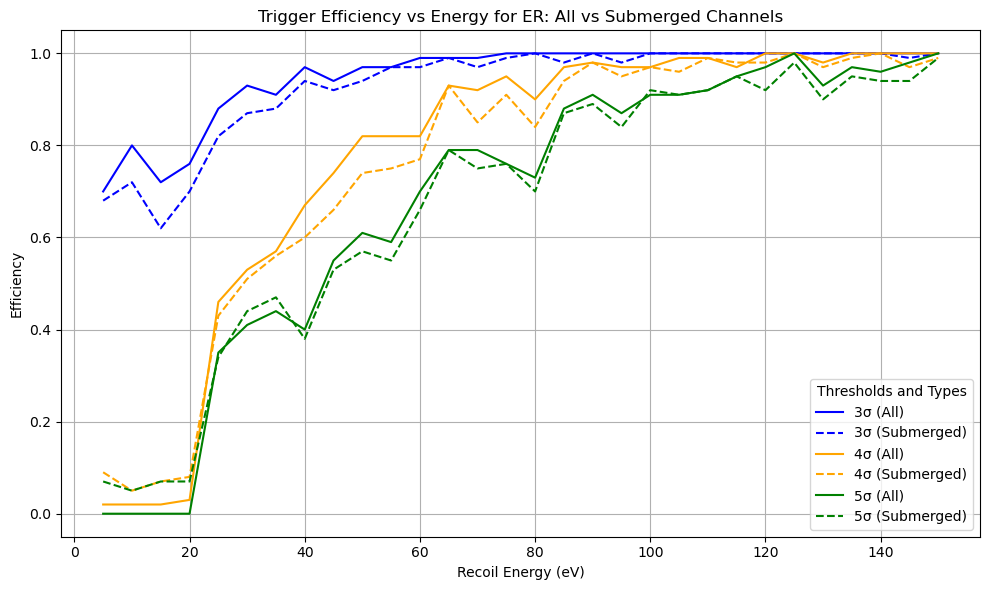

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Constants
n_sets = 100
sigma = 0.7674
thresholds = [round(n * sigma, 4) for n in [3, 4, 5]]
energy_values = list(range(5, 151, 5))
sigma_labels = {thresholds[0]: '3σ', thresholds[1]: '4σ', thresholds[2]: '5σ'}

# Initialize storage
pass_rates_all = {th: [] for th in thresholds}
pass_rates_sub = {th: [] for th in thresholds}

# Main loop
for energy in tqdm(energy_values, desc="Processing energies"):
    trace_path = f"/ceph/dwong/trigger_samples/ER/traces_energy_{energy}.zst"
    loaded_traces = load_traces_from_zstd(trace_path, n_traces=n_sets)

    max_amplitudes_all = []
    effective_amplitudes_sub = []

    for i in range(n_sets):
        # All channels
        amps_all = [trigger.fit_with_shift(trace)[0] for trace in loaded_traces[i]]
        max_amplitudes_all.append(np.max(amps_all))

        # Submerged (first 45 channels)
        traces_subset = loaded_traces[i][:45]
        results = [trigger.fit_with_shift(trace) for trace in traces_subset]
        amps = np.array([res[0] for res in results])
        t0s = np.array([res[2] for res in results])

        top2 = np.argsort(amps)[-2:][::-1]
        a1, t1 = amps[top2[0]], t0s[top2[0]]
        a2, t2 = amps[top2[1]], t0s[top2[1]]

        effective_amplitude = a1 + a2 if abs(t1 - t2) < 100 else a1
        effective_amplitudes_sub.append(effective_amplitude)

    max_amplitudes_all = np.array(max_amplitudes_all)
    effective_amplitudes_sub = np.array(effective_amplitudes_sub)

    for th in thresholds:
        pass_rates_all[th].append(np.sum(max_amplitudes_all > th) / n_sets)
        pass_rates_sub[th].append(np.sum(effective_amplitudes_sub > th) / n_sets)

# Plotting
plt.figure(figsize=(10, 6))
colors = ['blue', 'orange', 'green']

for i, th in enumerate(thresholds):
    color = colors[i]
    plt.plot(energy_values, pass_rates_all[th], linestyle='-', color=color, label=f"{sigma_labels[th]} (All)")
    plt.plot(energy_values, pass_rates_sub[th], linestyle='--', color=color, label=f"{sigma_labels[th]} (Submerged)")

plt.xlabel('Recoil Energy (eV)')
plt.ylabel('Efficiency')
plt.title('Trigger Efficiency vs Energy for ER: All vs Submerged Channels')
plt.legend(title='Thresholds and Types')
plt.grid(True)
plt.tight_layout()
plt.show()


Processing energies: 100%|██████████| 30/30 [06:23<00:00, 12.79s/it]


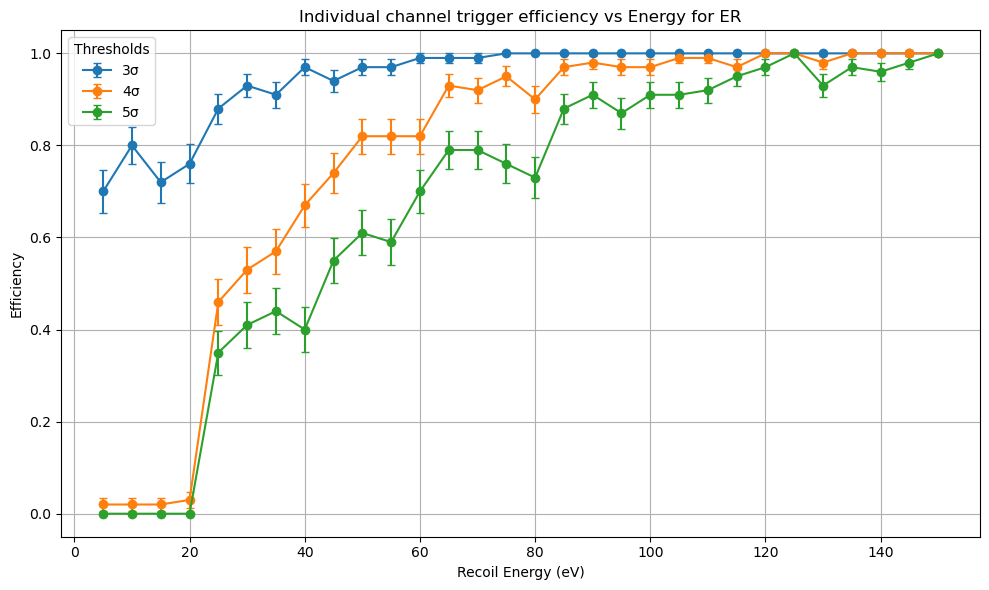

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Fixed parameters
sigma = 0.7674  # sigma for the fixed OF ampl distribution with MMC noise traces
thresholds = [round(n * sigma, 4) for n in [3, 4, 5]]
energy_values = list(range(5, 151, 5))
n_sets = 100  # Number of sets (trials) per energy

# Containers for results
pass_rates_by_threshold = {th: [] for th in thresholds}
uncertainties_by_threshold = {th: [] for th in thresholds}

# Threshold labels for plotting
sigma_labels = {
    thresholds[0]: '3σ',
    thresholds[1]: '4σ',
    thresholds[2]: '5σ'
}

# Loop over all energies
for energy in tqdm(energy_values, desc="Processing energies"):
    trace_path = f"/ceph/dwong/trigger_samples/ER/traces_energy_{energy}.zst"
    loaded_traces = load_traces_from_zstd(trace_path, n_traces=n_sets)

    max_amplitudes = []

    for i in range(n_sets):
        amps = [trigger.fit_with_shift(trace)[0] for trace in loaded_traces[i]]
        max_amplitudes.append(np.max(amps))

    max_amplitudes = np.array(max_amplitudes)

    for th in thresholds:
        count_pass = np.sum(max_amplitudes > th)
        pass_rate = count_pass / n_sets
        uncertainty = np.sqrt(pass_rate * (1 - pass_rate) / n_sets)

        pass_rates_by_threshold[th].append(pass_rate)
        uncertainties_by_threshold[th].append(uncertainty)

# Plotting with error bars
plt.figure(figsize=(10, 6))
for th in thresholds:
    plt.errorbar(
        energy_values,
        pass_rates_by_threshold[th],
        yerr=uncertainties_by_threshold[th],
        fmt='-o',
        capsize=3,
        label=sigma_labels[th]
    )

plt.xlabel('Recoil Energy (eV)')
plt.ylabel('Efficiency')
plt.title('Individual channel trigger efficiency vs Energy for ER')
plt.legend(title='Thresholds')
plt.grid(True)
plt.tight_layout()
plt.show()


Processing energies: 100%|██████████| 75/75 [44:43<00:00, 35.78s/it]


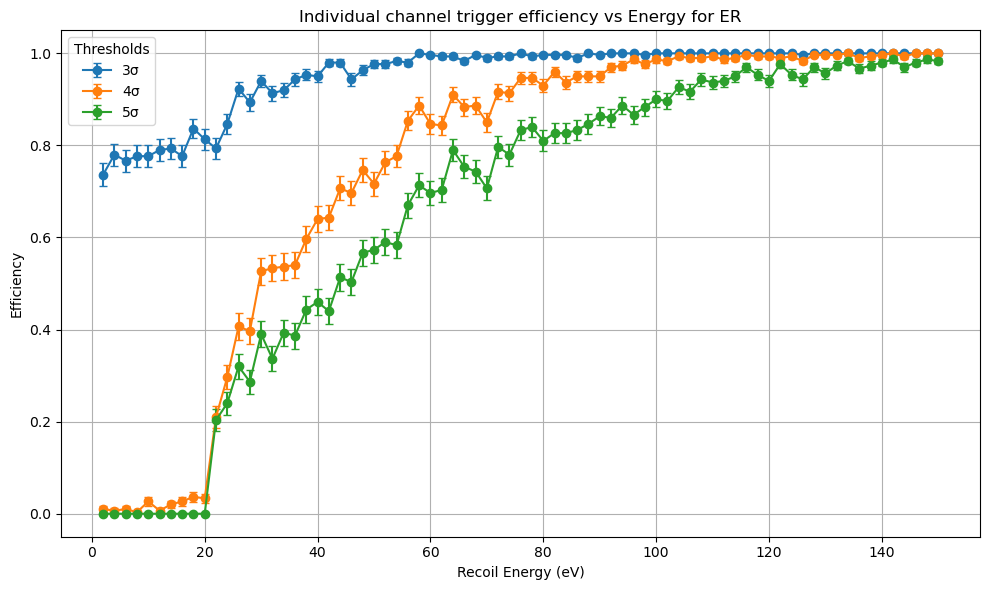

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Fixed parameters
sigma = 0.7674  # sigma for the fixed OF ampl distribution with MMC noise traces
thresholds = [round(n * sigma, 4) for n in [3, 4, 5]]
energy_values = list(range(2, 151, 2))
n_sets = 300  # Number of sets (trials) per energy

# Containers for results
pass_rates_by_threshold = {th: [] for th in thresholds}
uncertainties_by_threshold = {th: [] for th in thresholds}

# Threshold labels for plotting
sigma_labels = {
    thresholds[0]: '3σ',
    thresholds[1]: '4σ',
    thresholds[2]: '5σ'
}

# Loop over all energies
for energy in tqdm(energy_values, desc="Processing energies"):
    trace_path = f"/ceph/dwong/trigger_samples/large_samples/ER/traces_energy_{energy}.zst"
    loaded_traces = load_traces_from_zstd(trace_path, n_traces=n_sets)

    max_amplitudes = []

    for i in range(n_sets):
        amps = [trigger.fit_with_shift(trace)[0] for trace in loaded_traces[i]]
        max_amplitudes.append(np.max(amps))

    max_amplitudes = np.array(max_amplitudes)

    for th in thresholds:
        count_pass = np.sum(max_amplitudes > th)
        pass_rate = count_pass / n_sets
        uncertainty = np.sqrt(pass_rate * (1 - pass_rate) / n_sets)

        pass_rates_by_threshold[th].append(pass_rate)
        uncertainties_by_threshold[th].append(uncertainty)

# Plotting with error bars
plt.figure(figsize=(10, 6))
for th in thresholds:
    plt.errorbar(
        energy_values,
        pass_rates_by_threshold[th],
        yerr=uncertainties_by_threshold[th],
        fmt='-o',
        capsize=3,
        label=sigma_labels[th]
    )

plt.xlabel('Recoil Energy (eV)')
plt.ylabel('Efficiency')
plt.title('Individual channel trigger efficiency vs Energy for ER')
plt.legend(title='Thresholds')
plt.grid(True)
plt.tight_layout()
plt.show()
